In [34]:
import pandas as pd
import tensorflow 
import keras 
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model 
from sklearn.utils import shuffle 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [2]:
df = pd.read_csv('week1.csv')
df

,Name,ID,Fpts,Position,Team,Opponent,Salary,Value,Points Rank,Value Rank,Team total,Main Ownership %,Early Ownership %,Afternoon Ownership %
0,Lamar Jackson,0,26.44,QB,BAL,CLE,9300,2.84,A,A,27.50,18.0,22.5,NaN
1,Christian McCaffrey,1,22.69,RB,CAR,LV,10000,2.27,A,B,22.63,38.6,51.3,NaN
2,Cam Newton,2,21.14,QB,NE,MIA,7400,2.86,A,A,24.25,4.4,8.8,NaN
3,Dak Prescott,3,20.59,QB,DAL,LAR,8400,2.45,B,A,26.75,NaN,NaN,NaN
4,Russell Wilson,4,20.12,QB,SEA,ATL,8400,2.39,B,B,25.25,9.2,7.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,KJ Hamler,258,3.31,WR,DEN,TEN,4700,0.70,E,E,18.88,NaN,NaN,NaN
259,Taysom Hill,259,3.22,WR,NO,TB,5000,0.64,E,E,25.50,0.1,NaN,0.2
260,Anthony Firkser,260,3.11,TE,TEN,DEN,4200,0.74,E,E,22.13,NaN,NaN,NaN
261,Chase Edmonds,261,3.03,RB,ARI,SF,5000,0.61,E,E,20.88,0.1,NaN,0.2


In [4]:
data = df[["ID","Fpts", "Salary", "Value"]]
data

,ID,Fpts,Salary,Value
0,0,26.44,9300,2.84
1,1,22.69,10000,2.27
2,2,21.14,7400,2.86
3,3,20.59,8400,2.45
4,4,20.12,8400,2.39
...,...,...,...,...
258,258,3.31,4700,0.70
259,259,3.22,5000,0.64
260,260,3.11,4200,0.74
261,261,3.03,5000,0.61


In [15]:
x = data.drop(["Fpts", "ID"], axis=1)
y = data.Fpts.values.reshape(-1,1)

In [22]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

In [24]:
x_scaler = MinMaxScaler().fit(x_train)
y_scaler = MinMaxScaler().fit(y_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [25]:
x_train.shape, y_train.shape

((210, 2), (210, 1))

In [26]:
x_test.shape, y_test.shape

((53, 2), (53, 1))

In [27]:
model = linear_model.LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = model.predict(x_test)

print(model.coef_) #coefficient
print(model.intercept_) #y-intercept
print(model.score(x_train, y_train)) #evaluate the model 
print(mean_squared_error(y_test, y_pred)) #mse
print(r2_score(y_test, y_pred)) #R^2

[[1.8541217e-03 5.5632223e+00]]
[-9.93561677]
0.9851091842792792
0.24501366225646906
0.9878040270060581


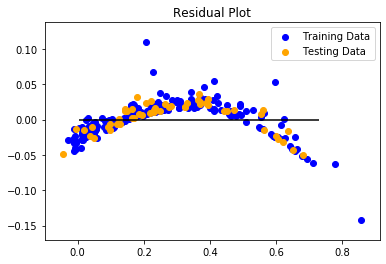

In [35]:
predictions = model.predict(x_test_scaled)
model.fit(x_train_scaled, y_train_scaled)
plt.scatter(model.predict(x_train_scaled), model.predict(x_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(x_test_scaled), model.predict(x_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [36]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual stats: {y_test_scaled[:10]}")

First 10 Predictions:   [[ 0.56096866]
 [ 0.33067734]
 [-0.04445246]
 [ 0.16290339]
 [ 0.09722137]
 [ 0.67968873]
 [ 0.45255474]
 [ 0.62034333]
 [ 0.36233115]
 [ 0.16289607]]
First 10 Actual stats: [[0.54758856]
 [0.30644473]
 [0.00426803]
 [0.16047802]
 [0.11182245]
 [0.73026035]
 [0.44046095]
 [0.65130175]
 [0.33461374]
 [0.14852753]]


In [38]:
y_new = y_scaler.inverse_transform(y_test_scaled)
y_new1 = y_scaler.inverse_transform(predictions)

In [39]:
y_new #actual 

array([[15.84],
       [10.19],
       [ 3.11],
       [ 6.77],
       [ 5.63],
       [20.12],
       [13.33],
       [18.27],
       [10.85],
       [ 6.49],
       [13.06],
       [ 3.77],
       [15.82],
       [ 7.29],
       [ 6.2 ],
       [11.07],
       [ 7.59],
       [ 4.79],
       [10.77],
       [11.53],
       [ 5.93],
       [11.19],
       [13.79],
       [17.84],
       [ 6.12],
       [ 8.53],
       [10.21],
       [ 6.93],
       [ 8.14],
       [ 6.09],
       [ 9.17],
       [11.75],
       [18.32],
       [10.18],
       [ 5.98],
       [19.24],
       [ 5.39],
       [ 9.04],
       [17.57],
       [16.57],
       [ 8.66],
       [ 7.87],
       [ 5.4 ],
       [ 7.19],
       [ 4.3 ],
       [ 8.16],
       [ 3.22],
       [ 4.46],
       [ 7.42],
       [11.56],
       [ 8.09],
       [ 6.47],
       [ 5.95]])

In [40]:
y_new1 #prediction 

array([[16.15349569],
       [10.75777009],
       [ 1.96847889],
       [ 6.82682635],
       [ 5.28789677],
       [18.93510684],
       [13.61335753],
       [17.54464415],
       [11.49941877],
       [ 6.82665492],
       [13.35379764],
       [ 3.43326075],
       [16.00520024],
       [ 7.82794921],
       [ 6.49346161],
       [11.64779994],
       [ 8.19877355],
       [ 4.17542375],
       [11.6105975 ],
       [12.22255195],
       [ 5.78841534],
       [11.70343217],
       [14.09544632],
       [17.21085081],
       [ 5.97391323],
       [ 8.82950067],
       [10.62807587],
       [ 6.99389446],
       [ 8.51413711],
       [ 6.36308163],
       [ 9.60818035],
       [12.22263767],
       [17.93364111],
       [10.59104486],
       [ 6.32596491],
       [18.23074632],
       [ 5.15828826],
       [ 9.46014206],
       [17.0437827 ],
       [16.22807201],
       [ 9.18163807],
       [ 8.10628177],
       [ 5.26912411],
       [ 7.38306287],
       [ 4.0452152 ],
       [ 8

In [239]:
data.head()

,ID,Fpts,Salary,Value
0,0,26.44,9300,2.84
1,1,22.69,10000,2.27
2,2,21.14,7400,2.86
3,3,20.59,8400,2.45
4,4,20.12,8400,2.39


In [240]:
r2_score(y_test, y_pred)

0.987513652174763

In [241]:
r2_score(y_test, y_pred).dtype

dtype('float64')

In [91]:
# predict = "Fpts"
# X = np.array(data.drop([predict], 1))
# y = np.array(data[predict])   


In [224]:
# ##Testing 30 times for most accurate model & store it in pickle as "projectionmodle.pickle"

# best = 0 
# for _ in range(30):
#     x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
#     linear = linear_model.LinearRegression()
#     linear.fit(x_train, y_train)
#     accuracy = linear.score(x_test, y_test)
#     print(accuracy)
#     if accuracy > best:
#         best = accuracy
#         with open("projectionmodel.pickle", "wb") as f:
#             pickle.dump(linear, f)
# pickle_in = open("projectionmodel.pickle", "rb")
# linear = pickle.load(pickle_in) 

In [225]:
# predictions = linear.predict(x_test)
# for x in range(len(predictions)):
#     print(predictions[x], x_test[x], y_test[x])

In [82]:
# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)
# print(acc)

0.9814690519550111


In [83]:
# print(linear.coef_)
# print(linear.intercept_)

[2.54404186e-02 2.50624282e-03 8.00586491e+00]
-20.712124919756818


In [242]:
df2 = pd.read_csv('week2.csv')
df2

data2 = df2[["ID","Fpts", "Salary", "Value"]]
data2

,ID,Fpts,Salary,Value
0,0,25.37,8200,3.09
1,1,27.72,10000,2.77
2,2,19.86,6400,3.10
3,3,21.42,6800,3.15
4,4,18.11,6500,2.79
...,...,...,...,...
236,256,3.56,4000,0.89
237,257,4.35,4300,1.01
238,259,4.89,4100,1.19
239,260,5.02,2500,2.01


In [243]:
x2 = data2.drop(["Fpts"], axis=1)
y2 = data2.Fpts  

In [246]:
x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(x2, y2, test_size = 0.2)

In [245]:
x_train2.shape, y_train2.shape

((192, 3), (192,))

In [247]:
x_test2.shape, y_test2.shape

((49, 3), (49,))

In [248]:
week2_predict = model.predict(x_train2)
week2_predict

array([ 9.91986367,  8.17797486, 10.7754187 , 12.82540352,  8.55292394,
       11.3747541 ,  9.03643942,  9.58414761, 13.73392022, 10.67566636,
       10.52752542, 15.36066546,  9.7303595 , 13.29136386,  9.00944284,
        8.29219867,  5.1273209 , 20.48339294, 15.24085071, 22.4256041 ,
        6.1594904 , 13.73051236, 17.11215252,  8.72727543,  8.80174758,
       16.16851494,  5.67227449, 13.77120685, 16.49969258,  8.34306292,
       10.06804987, 14.05145581,  9.46481686,  4.77862276,  9.56924223,
       12.2848334 , 15.42713847, 10.36244796,  2.39341835, 22.16672039,
        9.8158828 , 19.60086927, 10.4031771 ,  5.73507501,  8.61566673,
       10.79787685, 13.23482877, 11.50944443,  8.27924153, 12.86589596,
        8.82089696,  6.28936522, 19.47655074, 11.37023114, 15.64763106,
        1.98532085, 13.0701381 ,  5.97975187, 13.75582234,  6.19719846,
       14.09021639,  2.78106665,  5.30301747,  4.60820353,  9.36054343,
        8.80320235,  6.23139269, 10.98930434,  6.25795537, 18.71